In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('antest.csv')

In [10]:
df.head()

,event_id,event_date,customer_id,is_attend,group_ids,teacher_ids,attendance_id
0,5,2020-05-22,47,1,2,6,12
1,15,2020-06-03,354,1,5,4,57
2,34,2020-06-17,183,1,5,4,158
3,22,2020-06-11,12,1,1,3,95
4,36,2020-06-19,260,1,5,4,185


#### <span style="color:#00ccff">Описание признаков и их содержание</span>

In [11]:
df.describe()

,event_id,customer_id,is_attend,group_ids,teacher_ids,attendance_id
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,34.987500,281.806250,0.825000,3.131250,4.428125,166.218750
std,18.113708,194.831331,0.380562,1.591994,1.094797,96.801265
min,3.000000,12.000000,0.000000,1.000000,3.000000,1.000000
25%,19.000000,99.000000,1.000000,2.000000,4.000000,80.750000
50%,35.000000,258.000000,1.000000,3.000000,4.000000,170.500000
75%,51.250000,419.000000,1.000000,5.000000,5.000000,250.250000
max,67.000000,725.000000,1.000000,5.000000,7.000000,330.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   event_id       320 non-null    int64 
 1   event_date     320 non-null    object
 2   customer_id    320 non-null    int64 
 3   is_attend      320 non-null    int64 
 4   group_ids      320 non-null    int64 
 5   teacher_ids    320 non-null    int64 
 6   attendance_id  320 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 17.6+ KB


In [13]:
df.describe(include=['object'])

,event_date
count,320
unique,41
top,2020-06-17
freq,19


In [14]:
df.dtypes

event_id          int64
event_date       object
customer_id       int64
is_attend         int64
group_ids         int64
teacher_ids       int64
attendance_id     int64
dtype: object

Выявим пустые данные

In [15]:
df.isna().sum()

event_id         0
event_date       0
customer_id      0
is_attend        0
group_ids        0
teacher_ids      0
attendance_id    0
dtype: int64

Минимальное и максимальное количество посетителей

In [34]:
attendance_count = df[df['is_attend'] == 1].groupby('event_date').size()

min_attendance = attendance_count.min()
max_attendance = attendance_count.max()
min_attendance, max_attendance

(2, 14)

Учителя по популярности.

In [44]:
teacher_popularity = df.groupby('teacher_ids')['is_attend'].sum().reset_index()

teacher_popularity.columns = ['teacher_id', 'attendance_count']

teacher_popularity = teacher_popularity.sort_values(by='attendance_count', ascending=False)
teacher_popularity

,teacher_id,attendance_count
1,4,100
2,5,61
0,3,50
3,6,45
4,7,8


Количество посешений и пропусков учащихся

In [43]:
attendance_summary = df.groupby('customer_id')['is_attend'].value_counts().unstack(fill_value=0)
attendance_summary.head() #вывел пять строк

is_attend,0,1
customer_id,,
12,1,13
14,1,2
26,2,13
30,1,2
36,2,0


#### <span style="color: Salmon">Самый посещаемый урок</span>.

In [45]:
lesson_popularity = df.groupby('event_id')['is_attend'].sum().reset_index()

# Переименуем столбцы для удобства
lesson_popularity.columns = ['event_id', 'attendance_count']

# Отсортируем по количеству посещений
lesson_popularity = lesson_popularity.sort_values(by='attendance_count', ascending=False)
lesson_popularity

,event_id,attendance_count
16,19,9
52,58,9
46,52,9
31,36,8
29,34,8
...,...,...
32,37,2
30,35,2
61,67,2
51,57,1


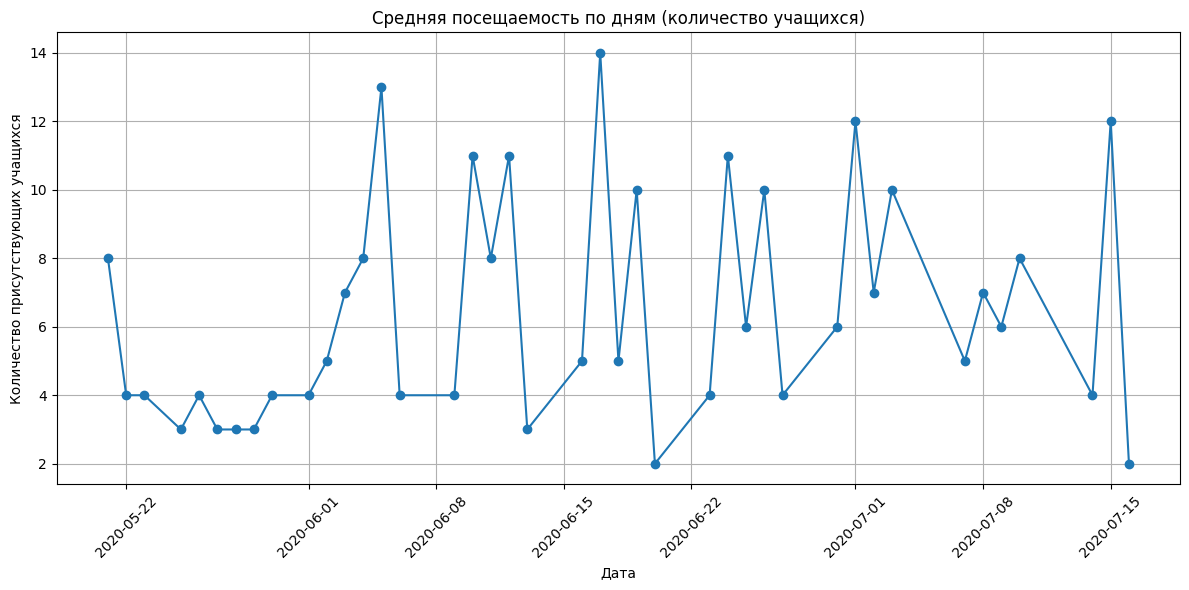

In [55]:

import matplotlib.pyplot as plt

df = pd.DataFrame(df)

# Приводим колонку event_date к нужному формату
df['event_date'] = pd.to_datetime(df['event_date'])

# Группируем по дате и считаем количество присутствующих студентов
attendance_summary = df.groupby('event_date')['is_attend'].sum().reset_index()
attendance_summary.columns = ['event_date', 'total_attendance']

# Строим график
plt.figure(figsize=(12, 6))
plt.plot(attendance_summary['event_date'], attendance_summary['total_attendance'], marker='o')
plt.title('Средняя посещаемость по дням (количество учащихся)')
plt.xlabel('Дата')
plt.ylabel('Количество присутствующих учащихся')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()